In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### EDA

Look at the median_house_value variable.

Does it have a long tail? (YES)

In [3]:
df = pd.read_csv('raw.githubusercontent.com_alexeygrigorev_datasets_master_housing.csv')

In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

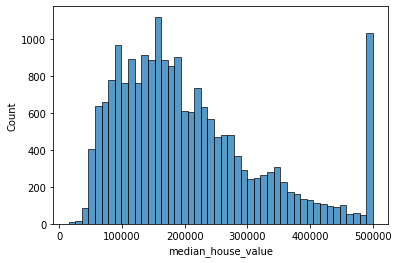

In [5]:
sns.histplot(df['median_house_value'])

### Subset the dataset:
First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [6]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
df1 = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
df2 = df1[['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]
df2

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Question 1: There's one feature with missing values. What is it?

In [9]:
df2.isnull().sum()
#total_bedrooms

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 2: What's the median (50% percentile) for variable 'population'?

In [11]:
df2['population'].median()
#1195

1195.0

### Prepare and split the dataset
Shuffle the initial dataset, use seed 42.

Split your data in train/val/test sets, with 60%/20%/20% distribution.

Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [12]:
n=len(df2)
n

15687

In [13]:
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_test-n_val

In [15]:
n_train+ n_val+ n_test

15687

In [16]:
np.random.seed(42)
idx = np.arange(n)

In [17]:
np.random.shuffle(idx)
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [18]:
idx[:n_train]

array([15183,  4469,  9316, ...,  5231,  2076,  4103])

In [19]:
df_train = df2.iloc[idx[:n_train]]
df_val = df2.iloc[idx[n_train:n_train+n_val]]
df_test = df2.iloc[idx[n_train+n_val:]]

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

In [25]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 3
We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.

Try both options. For each, train a linear regression model without regularization using the code from the lessons.

For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

In [27]:
df_train_zero = df_train.copy()
df_train_mean = df_train.copy()

In [28]:
df_train_zero['total_bedrooms'].fillna(0,inplace=True)

In [29]:
df_train_mean['total_bedrooms'].fillna(df_train['total_bedrooms'].mean(),inplace=True)

In [30]:
df_val_zero = df_val.copy()
df_val_mean = df_val.copy()

In [31]:
df_val_zero['total_bedrooms'].fillna(0,inplace=True)
df_val_mean['total_bedrooms'].fillna(df_train['total_bedrooms'].mean(),inplace=True)

In [32]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [33]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

#### Evaluate the model with fillna(0)

In [36]:
w0, w = train_linear_regression(df_train_zero,y_train)
y_pred = w0 + df_val_zero.dot(w)
round(rmse(y_val,y_pred),2)
#rmse(y_val,y_pred)

0.34

#### Evaluate the model with fillna(mean)

In [37]:
w0, w = train_linear_regression(df_train_mean,y_train)
y_pred = w0 + df_val_mean.dot(w)
rmse(y_val,y_pred).round(2)
#rmse(y_val,y_pred)

0.34

In [38]:
#Both results are equally good

### Question 4
Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [41]:
reg_list =  [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [42]:
X= df_train_zero.copy()
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., ..., 1., 1., 1.])

In [43]:
X = np.column_stack([ones, X])
X

array([[ 1.0000e+00,  3.6230e+01, -1.1914e+02, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [ 1.0000e+00,  3.4120e+01, -1.1779e+02, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [ 1.0000e+00,  3.3680e+01, -1.1797e+02, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [ 1.0000e+00,  3.4130e+01, -1.1808e+02, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [ 1.0000e+00,  3.4290e+01, -1.1846e+02, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [ 1.0000e+00,  3.4000e+01, -1.1841e+02, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [44]:
XTX = X.T.dot(X)
XTX.shape

(9, 9)

In [45]:
XTX = XTX + 0.01 * np.eye(XTX.shape[0])
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y_train)
w_full

array([-9.56105619e+00, -2.66473898e-01, -2.53705567e-01,  1.79574734e-03,
       -3.42196251e-05,  2.92147094e-04, -1.52152368e-04,  4.00857666e-04,
        1.80866259e-01])

In [46]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [47]:
w0, w = train_linear_regression_reg(df_train_zero, y_train, r=100.0)

y_pred = w0 + df_val_zero.dot(w)
rmse(y_val, y_pred)

0.34891577726256195

In [48]:
di = {}
for i in reg_list:
    w0, w = train_linear_regression_reg(df_train_zero, y_train, i)
    y_pred = w0 + df_val_zero.dot(w)
    di[i] = rmse(y_val, y_pred)

In [51]:
for key,value in di.items():
    if di[key] == min(di.values()):
        print('\nMin Key::',key)


Min Key:: 0


In [53]:
# Best regularization r=0
w0, w = train_linear_regression_reg(df_train_zero, y_train, 0)
y_pred = w0 + df_val_zero.dot(w)
print(rmse(y_val, y_pred))

0.34084790341353166


### Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

In [55]:
n2 = len(df2)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_test-n_val

In [56]:
def prep_df(r_seed):
    
    df21 = df2.copy()
    df21['total_bedrooms'].fillna(0,inplace=True)
    
    #Setting random seed
    np.random.seed(r_seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    print("Shuffle:: ",idx[:7])
    
    #Split dataset 60/20/20
    X_df_train = df21.iloc[idx[:n_train]]
    X_df_val = df21.iloc[idx[n_train:n_train+n_val]]
    X_df_test = df21.iloc[idx[n_train+n_val:]]    
    print(df_train.shape,df_val.shape,df_test.shape)
    
    #Reset index for df
    X_df_train = X_df_train.reset_index(drop=True)
    X_df_val = X_df_val.reset_index(drop=True)
    X_df_test = X_df_test.reset_index(drop=True)
        
    #Log transformation on the Target Variables
    y_train = np.log1p(X_df_train['median_house_value'].values)
    y_val = np.log1p(X_df_val['median_house_value'].values)
    y_test = np.log1p(X_df_test['median_house_value'].values)
    
    
    del X_df_train['median_house_value']
    del X_df_val['median_house_value']
    del X_df_test['median_house_value']
    
    
    w0, w = train_linear_regression(X_df_train,y_train)
    y_pr = w0 + X_df_val.dot(w)
    res = rmse(y_val,y_pr).round(3)
    
    return(res)

In [58]:
rmse_list = []

In [59]:
for i in range(9):
    rmse_list.append(prep_df(i))

Shuffle::  [ 2108 14652  9193  2466  4183 15503 10945]
(9413, 8) (3137, 8) (3137, 8)
Shuffle::  [13724 12519  1301  5037  7703  7921  7504]
(9413, 8) (3137, 8) (3137, 8)
Shuffle::  [ 7820  6855 12244  7188   109  4265  6069]
(9413, 8) (3137, 8) (3137, 8)
Shuffle::  [ 6856  5611 11049  5904  1415  7549  6433]
(9413, 8) (3137, 8) (3137, 8)
Shuffle::  [10994 12843 13901 11023  5780  3790  4414]
(9413, 8) (3137, 8) (3137, 8)
Shuffle::  [ 8324 12931  2230  8018  7758 10368 11085]
(9413, 8) (3137, 8) (3137, 8)
Shuffle::  [ 8244 10521  7999  3442  9216 10985  5660]
(9413, 8) (3137, 8) (3137, 8)
Shuffle::  [13915  1406  9855  2998 13231 15216  9260]
(9413, 8) (3137, 8) (3137, 8)
Shuffle::  [ 6892 13175  3923  6434 13607 10567  8127]
(9413, 8) (3137, 8) (3137, 8)


In [60]:
rmse_list

[0.338, 0.338, 0.338, 0.332, 0.339, 0.343, 0.339, 0.347, 0.351]

In [61]:
round(np.std(rmse_list),3)

0.005

### Question 6
Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

In [62]:
df22 = df2.copy()
df22['total_bedrooms'].fillna(0,inplace=True)

#Setting random seed = 9
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)
print("Shuffle_9:: ",idx[:7])

#Split dataset 60/20/20
X_df_train = df22.iloc[idx[:n_train]]
X_df_val = df22.iloc[idx[n_train:n_train+n_val]]
X_df_test = df22.iloc[idx[n_train+n_val:]]    
print(df_train.shape,df_val.shape,df_test.shape)

Shuffle_9::  [11994  5634 13629 13205  6243  4122  3213]
(9413, 8) (3137, 8) (3137, 8)


In [63]:
#Reset index for df
X_df_train = X_df_train.reset_index(drop=True)
X_df_val = X_df_val.reset_index(drop=True)
X_df_test = X_df_test.reset_index(drop=True)

#Log transformation on the Target Variables
y_train = np.log1p(X_df_train['median_house_value'].values)
y_val = np.log1p(X_df_val['median_house_value'].values)
y_test = np.log1p(X_df_test['median_house_value'].values)


del X_df_train['median_house_value']
del X_df_val['median_house_value']
del X_df_test['median_house_value']

In [64]:
X_full_train = pd.concat([X_df_train,X_df_val])

In [66]:
y_full_train = np.concatenate([y_train,y_val])
y_full_train

array([12.19096408, 12.56094947, 12.82638297, ..., 11.80709396,
       12.40738359, 12.46844076])

In [67]:
#w0, w = train_linear_regression(X_full_train.values, y_full_train)
w0, w = train_linear_regression_reg(X_full_train.values, y_full_train, 0.001)
y_pr = w0 + X_df_test.dot(w)
rmse_test = rmse(y_test,y_pr).round(3)

In [68]:
rmse_test

0.335